# Enter Student Name & ID

In [45]:
student_id =400101197   #@param {type:"integer"}
student_name = "Amirreza Dehghani" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101197
your name: Amirreza Dehghani


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [46]:
import numpy as np

In [47]:
def myPCA(X, num_components):
    #
    #Center the data
    mean_X = np.mean(X, axis=0)
    centered_X = X - mean_X
    
    #covariance matrix
    cov_matrix = np.cov(centered_X, rowvar=False)
    
    #eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    #Sort the eigenvalues and their eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]
    
    #Transform the data to the new subspace
    transformed_X = np.dot(centered_X, selected_eigenvectors)
    
    return transformed_X, selected_eigenvectors

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

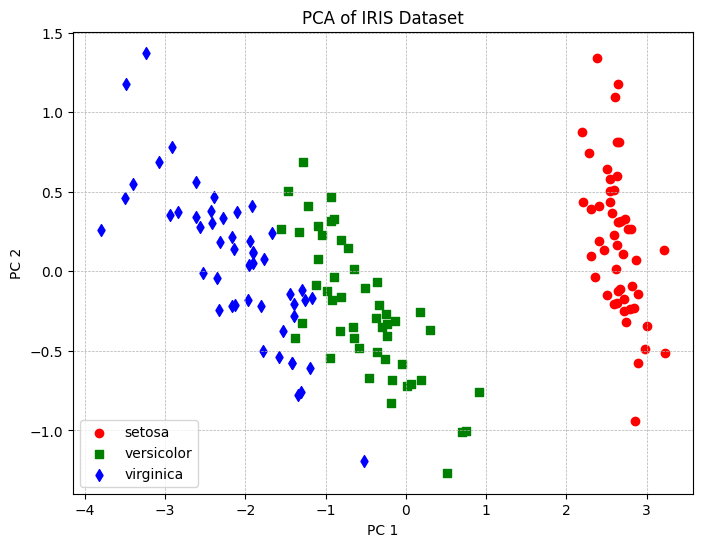

In [49]:
# myPCA on IRIS
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce to 2D
num_components = 2
transformed_X, components = myPCA(X, num_components)

# Plot the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
markers = ['o', 's', 'd']

for i, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(transformed_X[y == i, 0], transformed_X[y == i, 1], 
                color=color, label=iris.target_names[i], marker=marker)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of IRIS Dataset')
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.
Eigenfaces is a technique used in computer vision and pattern recognition, specifically for the task of facial recognition. The term "eigenfaces" comes from the fact that the technique uses a set of "eigenvectors" to represent different aspects of faces. These eigenvectors are derived using Principal Component Analysis (PCA), which is a statistical method.Eigenfaces are essentially the result of applying PCA to a dataset of face images. PCA identifies the principal components (eigenvectors) that account for the most variance in the data. In the context of facial recognition, these principal components are the eigenfaces, which capture the key features and variations in the set of face images.By projecting new face images onto the eigenfaces, we can perform various tasks such as dimensionality reduction, noise reduction, and most importantly, face recognition. This process leverages the fact that faces have many common features and patterns, allowing PCA to effectively capture these patterns and represent them in a lower-dimensional space.

`Answer 2.1: `


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [50]:
import os
import cv2
from sklearn.preprocessing import StandardScaler

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img.flatten())  # Flatten the image
    return images

main_folder = 'ORL'

# Initialize lists for training and testing data
X_train, X_test = [], []
y_train, y_test = [], []

# Load all images from all folders and split into training and testing sets
for i, folder in enumerate(sorted(os.listdir(main_folder))):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):
        images = load_images_from_folder(folder_path)
        X_train.extend(images[:5])  # First five images for training
        X_test.extend(images[5:])   # Last five images for testing
        y_train.extend([i] * 5)
        y_test.extend([i] * 5)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

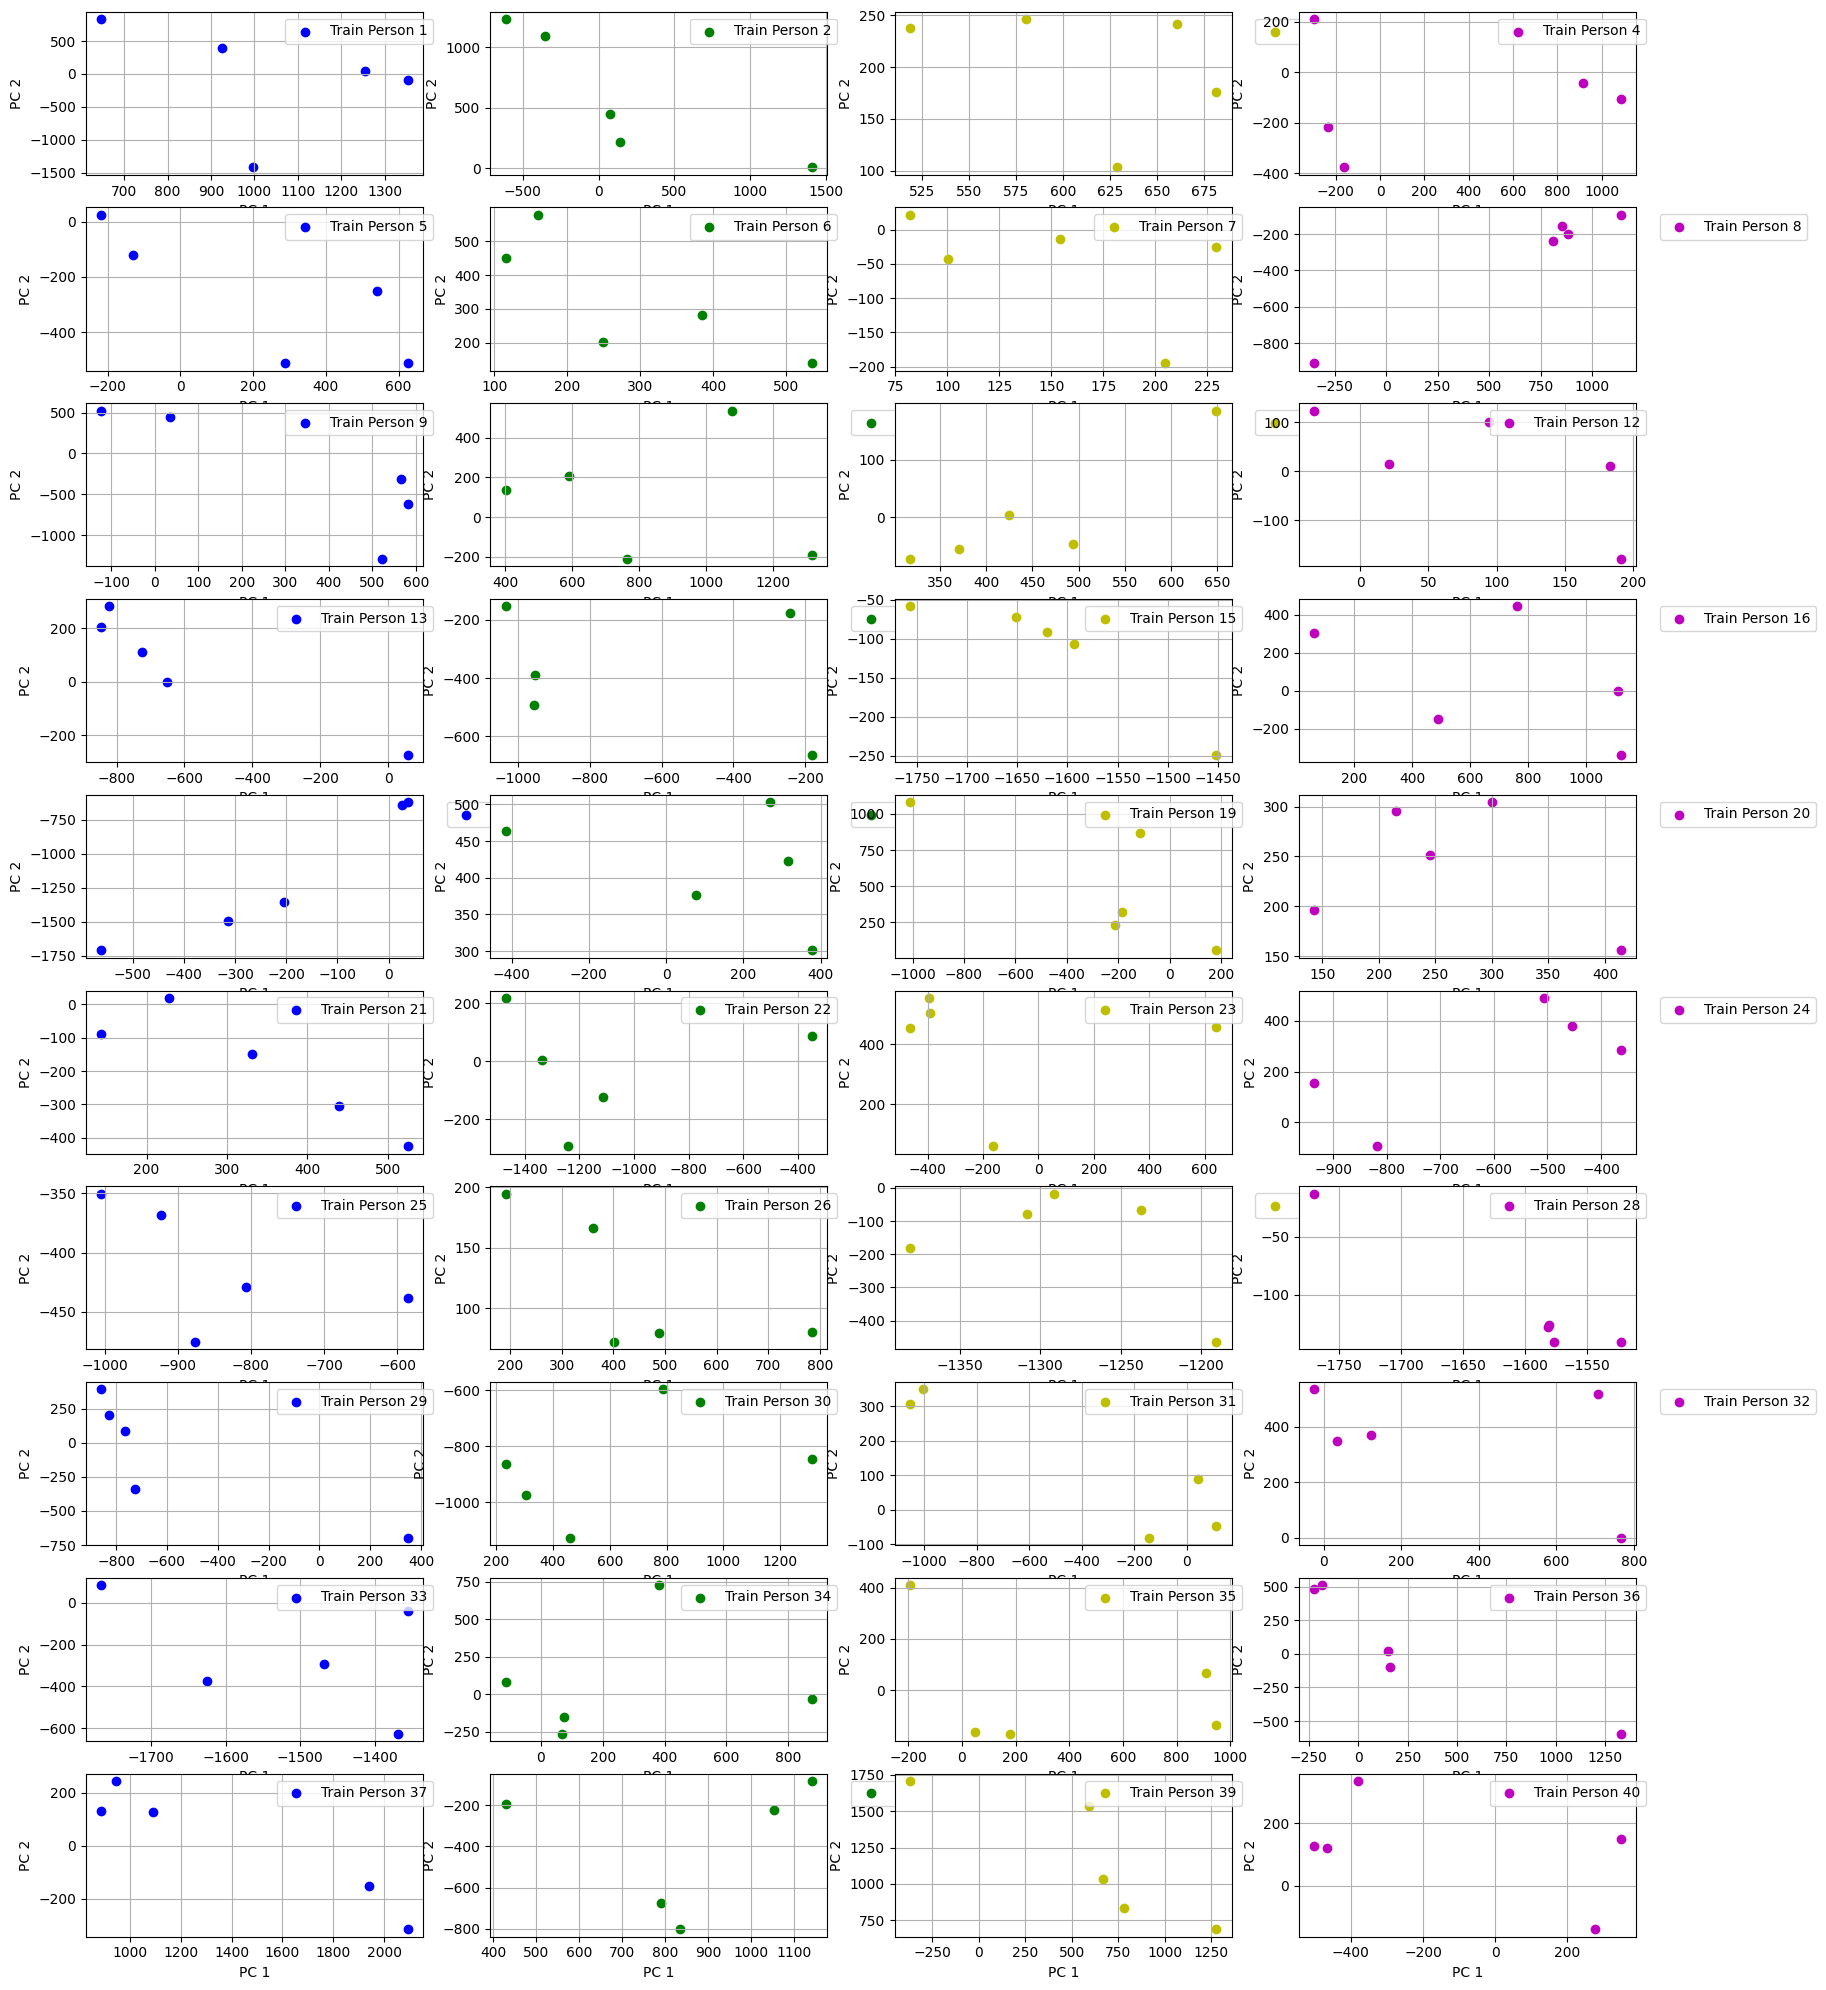

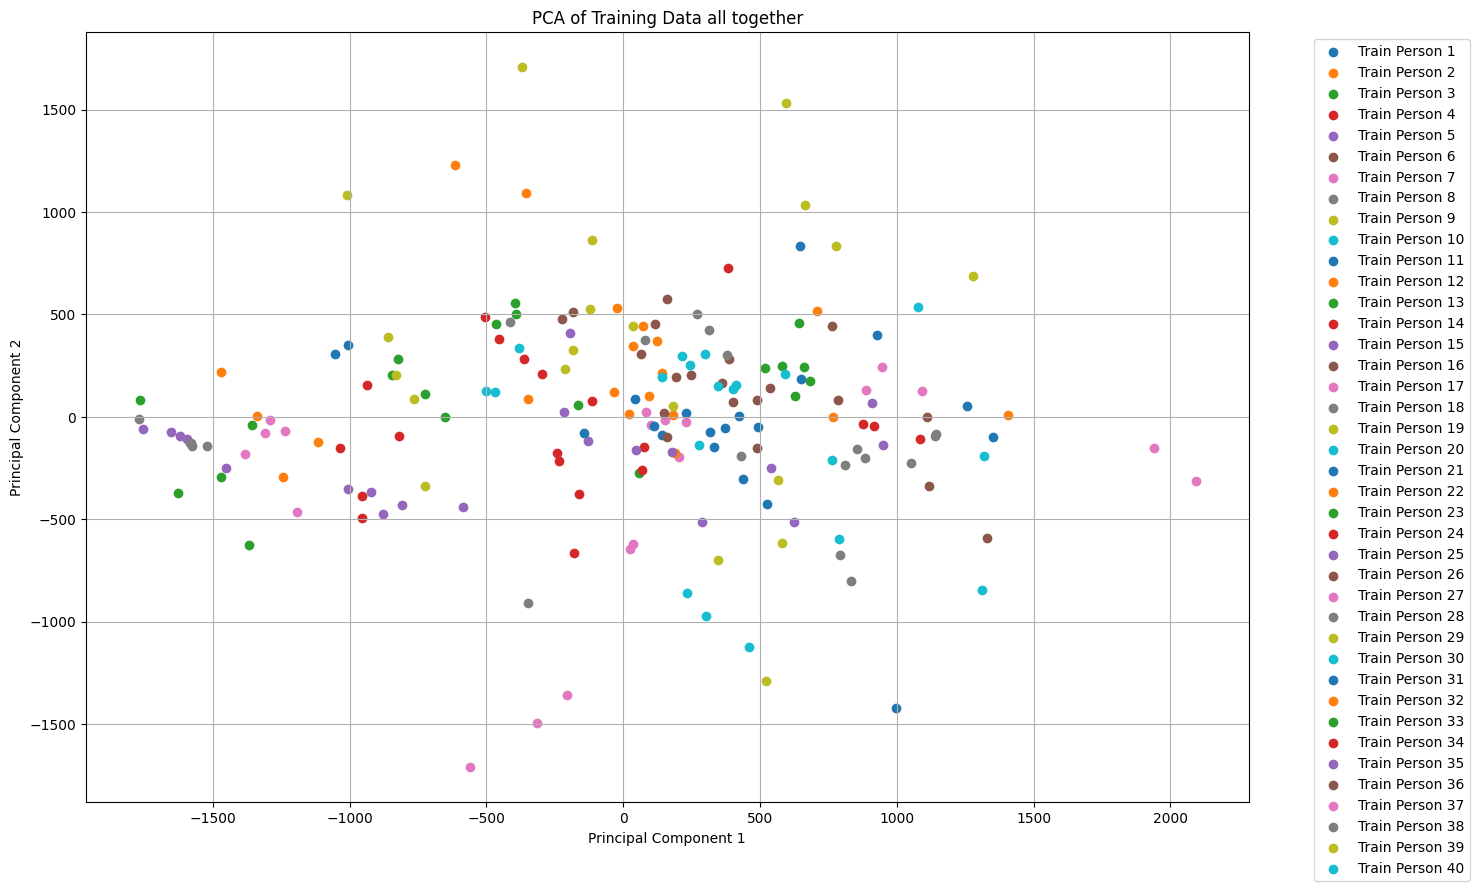

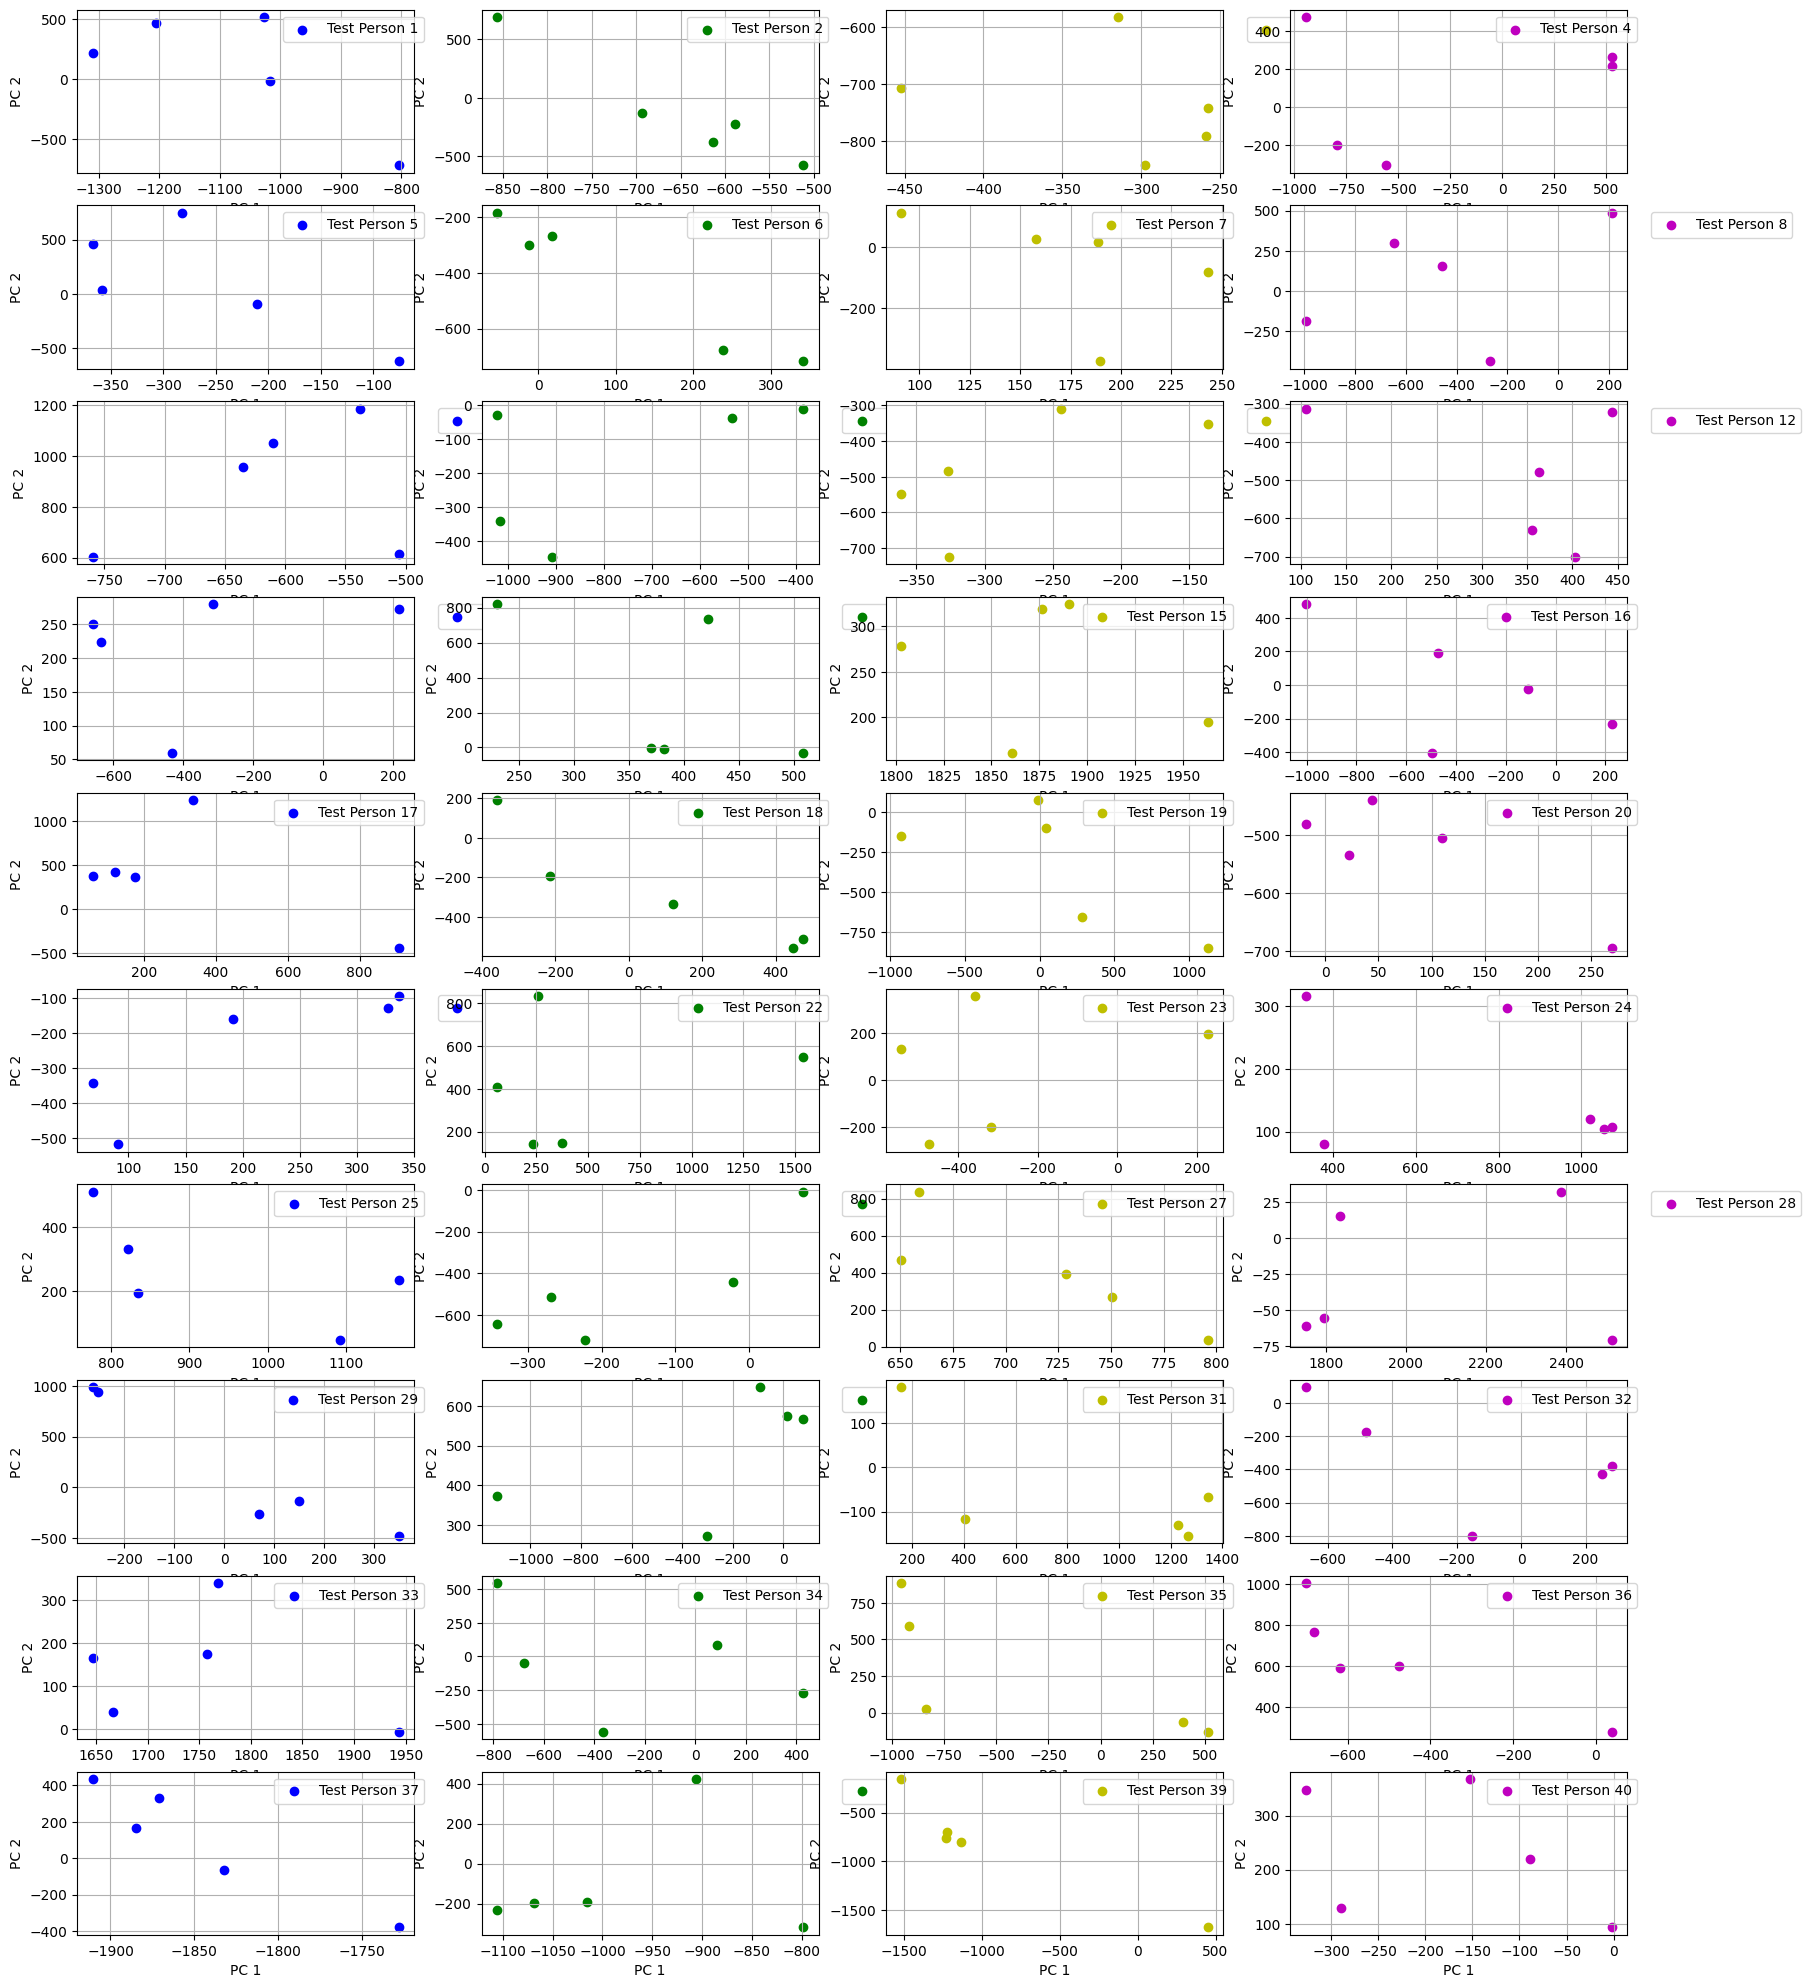

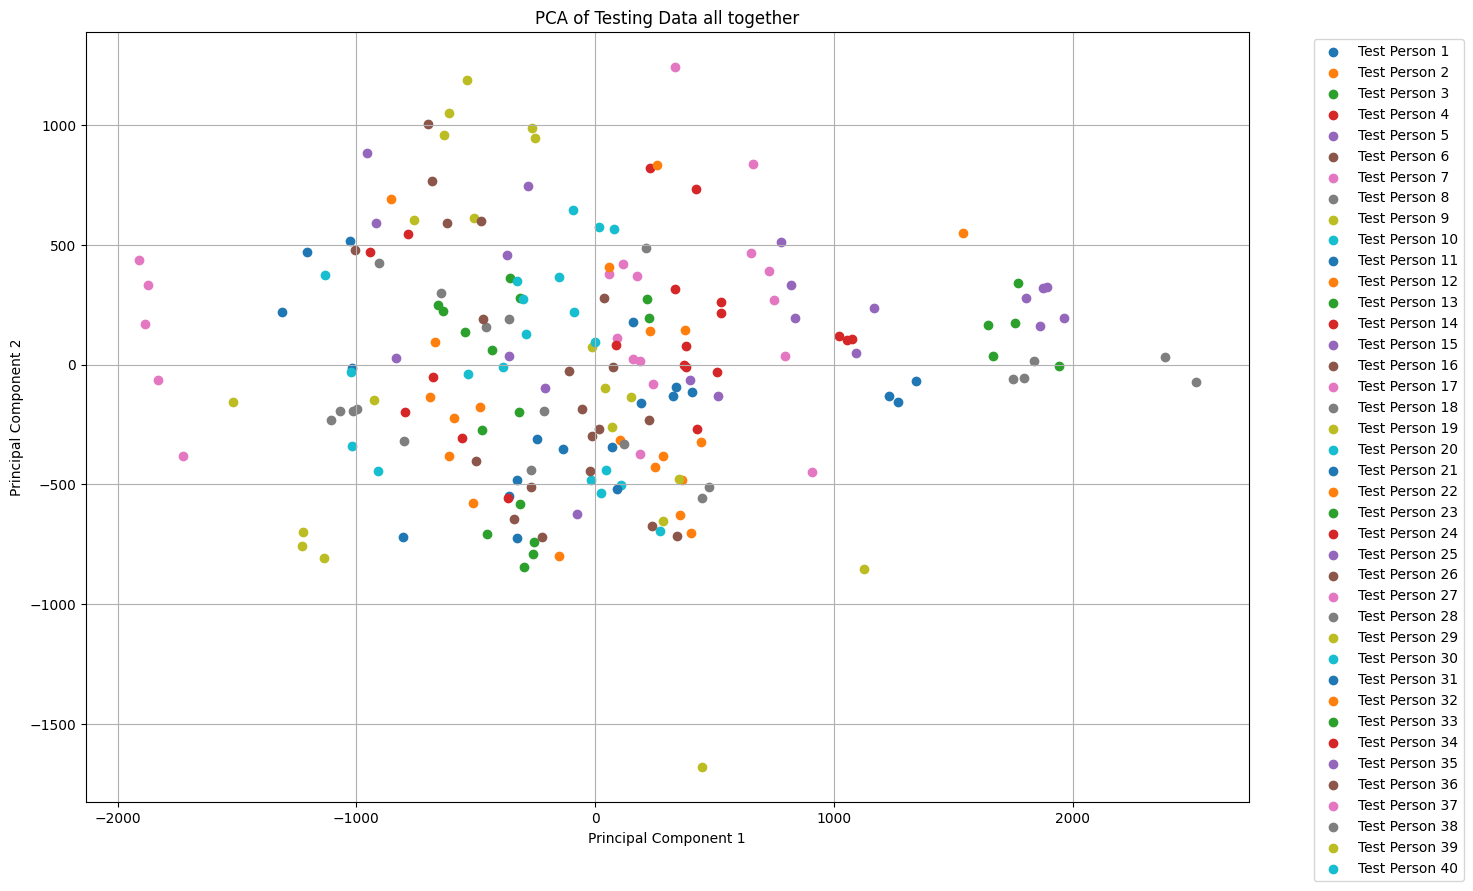

In [51]:
def set_color(i):
    if i%4==0:
        return 'b'
    elif i%4==1:
        return 'g'
    elif i%4==2:
        return 'y'
    else:
        return 'm'   


num_components = 45
transformed_X_train, components_train = myPCA(X_train, num_components)
transformed_X_test, components_test = myPCA(X_test, num_components)

# Plot the results
plt.figure(figsize=(20, 25))


# Training data
for i in range(40):  # Assuming 40 individuals
    plt.subplot(10,4,i+1)
    plt.scatter(transformed_X_train[y_train == i, 0], transformed_X_train[y_train == i, 1], label=f'Train Person {i+1}',color=set_color(i))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(True)


plt.show()

plt.figure(figsize=(15, 10))
for i in range(40):  # Assuming 40 individuals
    plt.scatter(transformed_X_train[y_train == i, 0], transformed_X_train[y_train == i, 1], label=f'Train Person {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Data all together')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



# Testing data
plt.figure(figsize=(20, 25))
for i in range(40):  # Assuming 40 individuals
    plt.subplot(10,4,i+1)
    plt.scatter(transformed_X_test[y_test == i, 0], transformed_X_test[y_test == i, 1], label=f'Test Person {i+1}',color=set_color(i))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid(True)
plt.show()

plt.figure(figsize=(15, 10))
for i in range(40):  # Assuming 40 individuals
    plt.scatter(transformed_X_test[y_test == i, 0], transformed_X_test[y_test == i, 1], label=f'Test Person {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Testing Data all together')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(transformed_X_train, y_train)

# Predict the labels of the PCA-transformed testing data
y_pred = lda.predict(transformed_X_test)

# Calculate and report the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA classifier on PCA-transformed data: {accuracy:.2f}')

Accuracy of LDA classifier on PCA-transformed data: 0.00


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [53]:
num_components = 100
transformed_X_train, components_train = myPCA(X_train, num_components)
transformed_X_test, components_test = myPCA(X_test, num_components)

lda = LDA()
lda.fit(transformed_X_train, y_train)

# Predict the labels of the PCA-transformed testing data
y_pred = lda.predict(transformed_X_test)

# Calculate and report the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA classifier on PCA-transformed data for num_component=100: {accuracy:.2f}')

num_components = 1000
transformed_X_train, components_train = myPCA(X_train, num_components)
transformed_X_test, components_test = myPCA(X_test, num_components)

lda = LDA()
lda.fit(transformed_X_train, y_train)

# Predict the labels of the PCA-transformed testing data
y_pred = lda.predict(transformed_X_test)

# Calculate and report the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA classifier on PCA-transformed data for num_component=1000: {accuracy:.2f}')


print('Maybe its need more than 10000 PC for large accuracy')

Accuracy of LDA classifier on PCA-transformed data for num_component=100: 0.01
Accuracy of LDA classifier on PCA-transformed data for num_component=1000: 0.03
Maybe its need more than 10000 PC for large accuracy
